# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [17]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# TODO: Set up a connection the "Market.db" database
con = sqlite3.connect("db\Market.db")

# TODO: Set up the cursor
cursor = con.cursor()
cursor.execute("SELECT * FROM Customers")

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\since\AppData\Local\Temp\ipykernel_37780\1736118596.py:2: SyntaxWarning: invalid escape sequence '\M'
  con = sqlite3.connect("db\Market.db")


### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [19]:
# TODO: Write a SQL query which will answer the question above.
# Calculate the number of products that cost less than $10 in the Products table
cursor.execute("""SELECT COUNT(ProductID) as totalproducts_under10 FROM Products
    WHERE price < 10;
""")


rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [20]:
# TODO: Write a SQL query which will answer the question above.
# Identify the most frequent countries in the Supplier table
cursor.execute("""SELECT DISTINCT Country, COUNT(SupplierID) as supplier_count FROM Suppliers
               GROUP BY Country
               ORDER BY supplier_count DESC;
""")

# TODO: Fetch your list of tuples and print it out
supplier_country = cursor.fetchall()
print(supplier_country)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


        Country  SupplierCount
0           USA              4
1       Germany              3
2        France              3
3            UK              2
4        Sweden              2
5         Japan              2
6         Italy              2
7        Canada              2
8     Australia              2
9         Spain              1
10    Singapore              1
11       Norway              1
12  Netherlands              1
13      Finland              1
14      Denmark              1
15       Brazil              1


C:\Users\since\AppData\Local\Temp\ipykernel_37780\2421560454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Country", y="SupplierCount", palette='Spectral')


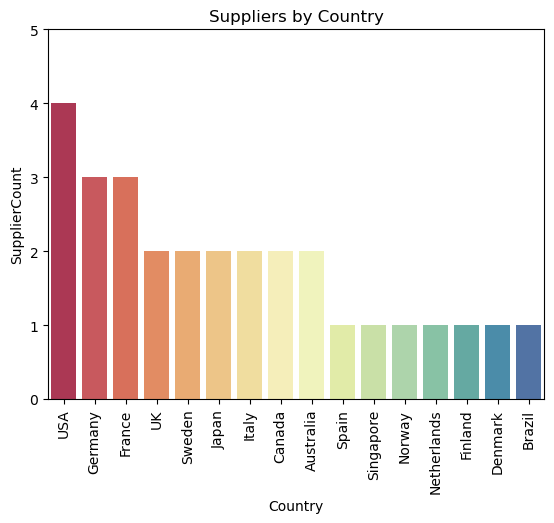

<Figure size 1500x480 with 0 Axes>

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data=supplier_country, columns=['Country', 'SupplierCount'])
print(df)
# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x="Country", y="SupplierCount", palette='Spectral')
plt.title("Suppliers by Country")
plt.xticks(rotation=90)
plt.yticks([0,1,2,3,4,5])
plt.figure(figsize=(15, 4.8))
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
# Group the customers by country, count the number of customersid in each group,
# and orders the results in descending order based on the customer count.
cursor.execute("""SELECT DISTINCT Country, COUNT(CustomerID) as customercountry_count FROM Customers
               GROUP BY Country
               ORDER BY customercountry_count DESC;
""")

# TODO: Fetch your list of tuples and print it out
customer_country = cursor.fetchall()
print(customer_country)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


        Country  CustomerCount
0           USA             13
1       Germany             11
2        France             11
3        Brazil              9
4            UK              7
5         Spain              5
6        Mexico              5
7     Venezuela              4
8         Italy              3
9        Canada              3
10    Argentina              3
11  Switzerland              2
12       Sweden              2
13     Portugal              2
14      Finland              2
15      Denmark              2
16      Belgium              2
17      Austria              2
18       Poland              1
19       Norway              1
20      Ireland              1


C:\Users\since\AppData\Local\Temp\ipykernel_37780\1730505681.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Country', y='CustomerCount', data=df, s=100, palette= 'Spectral')


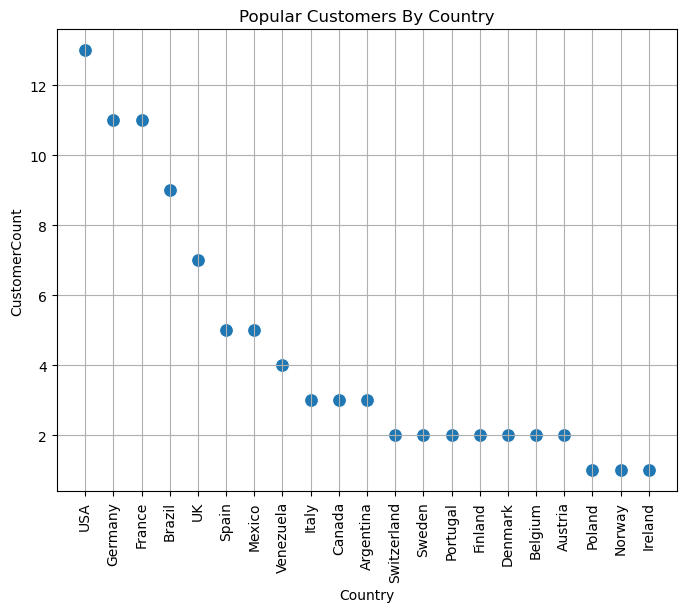

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data=customer_country, columns=['Country', 'CustomerCount'])
print(df)

# TODO: Generate a visualization on this dataframe
# Create a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Country', y='CustomerCount', data=df, s=100, palette= 'Spectral') 
plt.title('Popular Customers By Country')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('CustomerCount')
plt.grid(True)
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
#Join products with order details table, product ID, name, and quantity then
# order the product quantity (ascending) and limit to the first 20 products.
cursor.execute("""SELECT DISTINCT p.ProductID, p.ProductName, SUM(o.Quantity) as TotalQuantity
               FROM Products as p JOIN OrderDetails as o
               ON p.ProductID = o.ProductID
               GROUP BY P.ProductName
               ORDER BY TotalQuantity ASC
               LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
product_count = cursor.fetchall()
print(product_count)

[(67, 'Laughing Lumberjack Lager', 5), (45, 'Røgede sild', 15), (22, "Gustaf's Knäckebröd", 18), (9, 'Mishi Kobe Niku', 20), (15, 'Genen Shouyu', 25), (7, "Uncle Bob's Organic Dried Pears", 25), (12, 'Queso Manchego La Pastora', 27), (6, "Grandma's Boysenberry Spread", 36), (37, 'Gravad lax', 39), (73, 'Röd Kaviar', 45), (52, 'Filo Mix', 48), (32, 'Mascarpone Fabioli', 52), (48, 'Chocolade', 70), (50, 'Valkoinen suklaa', 70), (25, 'NuNuCa Nuß-Nougat-Creme', 71), (42, 'Singaporean Hokkien Fried Mee', 77), (3, 'Aniseed Syrup', 80), (10, 'Ikura', 85), (66, 'Louisiana Hot Spiced Okra', 90), (27, 'Schoggi Schokolade', 90)]


    ProductID1                      ProductName  Quantity
0           67        Laughing Lumberjack Lager         5
1           45                      Røgede sild        15
2           22              Gustaf's Knäckebröd        18
3            9                  Mishi Kobe Niku        20
4           15                     Genen Shouyu        25
5            7  Uncle Bob's Organic Dried Pears        25
6           12        Queso Manchego La Pastora        27
7            6     Grandma's Boysenberry Spread        36
8           37                       Gravad lax        39
9           73                       Röd Kaviar        45
10          52                         Filo Mix        48
11          32               Mascarpone Fabioli        52
12          48                        Chocolade        70
13          50                 Valkoinen suklaa        70
14          25          NuNuCa Nuß-Nougat-Creme        71
15          42    Singaporean Hokkien Fried Mee        77
16           3

C:\Users\since\AppData\Local\Temp\ipykernel_37780\1793540320.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='ProductName', data=df, orient='h', palette='Spectral')


Text(0.5, 1.0, 'Quantity Sum by Product')

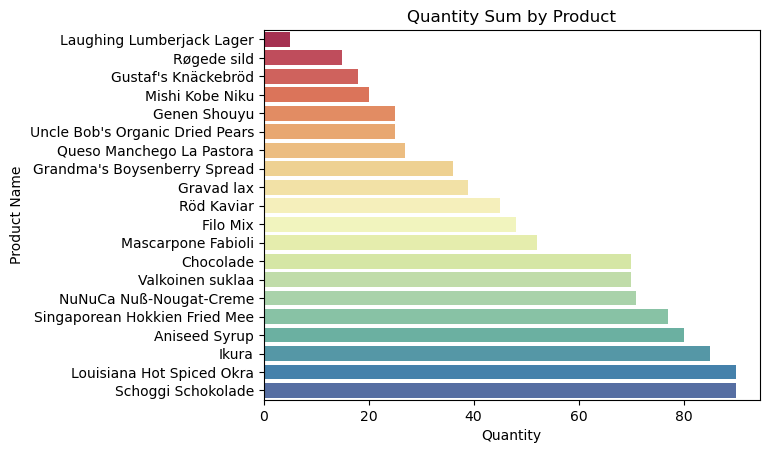

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data=product_count, columns=[ 'ProductID1', 'ProductName','Quantity'])
print(df)

# TODO: Generate a visualization on this dataframe
#Create a horizontal bar chart
sns.barplot(x='Quantity', y='ProductName', data=df, orient='h', palette='Spectral') 
plt.ylabel('Product Name')
plt.xlabel('Quantity')
plt.title('Quantity Sum by Product')


### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [26]:
# TODO: Write a SQL query which will answer the question above.
# Join Products and OrderDetails tables, calculate the revenue per product,
# order product by revenue (ascending) to find the smallest revenue items, and limit to 20 results.
cursor.execute("""SELECT o.ProductID, p.ProductName, p.price, o.Quantity, SUM(o.Quantity * p.Price) as total_revenue  
               FROM OrderDetails as o JOIN Products as p  
               ON p.ProductID = o.ProductID
               GROUP BY o.ProductID, p.ProductName
               ORDER BY total_revenue ASC
               LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
product_revcount = cursor.fetchall()
print(product_revcount)

[(67, 'Laughing Lumberjack Lager', 14, 5, 70), (45, 'Røgede sild', 9.5, 15, 142.5), (52, 'Filo Mix', 7, 20, 336), (22, "Gustaf's Knäckebröd", 21, 6, 378), (15, 'Genen Shouyu', 15.5, 20, 387.5), (13, 'Konbu', 6, 10, 552), (73, 'Röd Kaviar', 15, 25, 675), (24, 'Guaraná Fantástica', 4.5, 15, 711.0), (7, "Uncle Bob's Organic Dried Pears", 30, 15, 750), (33, 'Geitost', 2.5, 25, 790.0), (3, 'Aniseed Syrup', 10, 30, 800), (48, 'Chocolade', 12.75, 70, 892.5), (6, "Grandma's Boysenberry Spread", 25, 30, 900), (47, 'Zaanse koeken', 9.5, 16, 959.5), (25, 'NuNuCa Nuß-Nougat-Creme', 14, 4, 994), (37, 'Gravad lax', 26, 1, 1014), (12, 'Queso Manchego La Pastora', 38, 12, 1026), (42, 'Singaporean Hokkien Fried Mee', 14, 10, 1078), (75, 'Rhönbräu Klosterbier', 7.75, 30, 1116.0), (50, 'Valkoinen suklaa', 16.25, 15, 1137.5)]


    ProductID                      ProductName  Price  Quantity  TotalRevenue
0          67        Laughing Lumberjack Lager  14.00         5          70.0
1          45                      Røgede sild   9.50        15         142.5
2          52                         Filo Mix   7.00        20         336.0
3          22              Gustaf's Knäckebröd  21.00         6         378.0
4          15                     Genen Shouyu  15.50        20         387.5
5          13                            Konbu   6.00        10         552.0
6          73                       Röd Kaviar  15.00        25         675.0
7          24               Guaraná Fantástica   4.50        15         711.0
8           7  Uncle Bob's Organic Dried Pears  30.00        15         750.0
9          33                          Geitost   2.50        25         790.0
10          3                    Aniseed Syrup  10.00        30         800.0
11         48                        Chocolade  12.75        70 

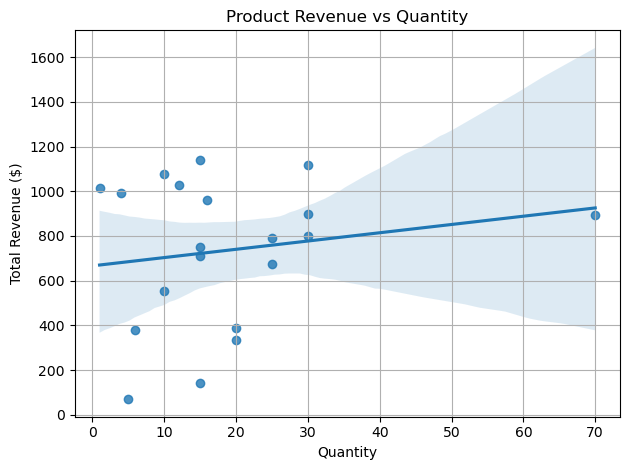

Pearson correlation coefficient: 0.17


In [27]:
# TODO: Convert your list of tuples to a dataframe
leastpop_df = pd.DataFrame(data=product_revcount, columns=['ProductID', 'ProductName', 'Price', 'Quantity', 'TotalRevenue'])
print(leastpop_df)

# TODO: Generate a visualization on this dataframe
# Created a scatterplot with regression line
sns.regplot(x= 'Quantity', y='TotalRevenue', data=leastpop_df)
plt.xlabel('Quantity')
plt.ylabel('Total Revenue ($)')
plt.title('Product Revenue vs Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

#Calculate the Pearson Correlation Coefficient
correlation = leastpop_df['Quantity'].corr(leastpop_df['TotalRevenue'])
print(f"Pearson correlation coefficient: {correlation:.2f}")

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [28]:
# TODO: Write a SQL query which will answer the question above.
# Join tables—Customers, Orders, —group by customer country,
# and then order results by total quantity (descending)
cursor.execute("""SELECT c.Country, COUNT(o.OrderID) AS TotalOrders
    FROM Orders o
    JOIN Customers c ON o.CustomerID = c.CustomerID
    GROUP BY c.Country
    ORDER BY TotalOrders DESC;
""")

# TODO: Fetch your list of tuples and print it out
country_ordercount = cursor.fetchall()
print(country_ordercount)

[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1), ('Argentina', 1)]


        Country  TotalOrders
0           USA           29
1       Germany           25
2        Brazil           19
3        France           18
4       Austria           13
5            UK           12
6     Venezuela            9
7        Mexico            9
8        Canada            9
9       Finland            8
10       Sweden            7
11        Spain            7
12        Italy            7
13      Ireland            6
14     Portugal            5
15  Switzerland            4
16      Denmark            4
17      Belgium            2
18       Poland            1
19       Norway            1
20    Argentina            1


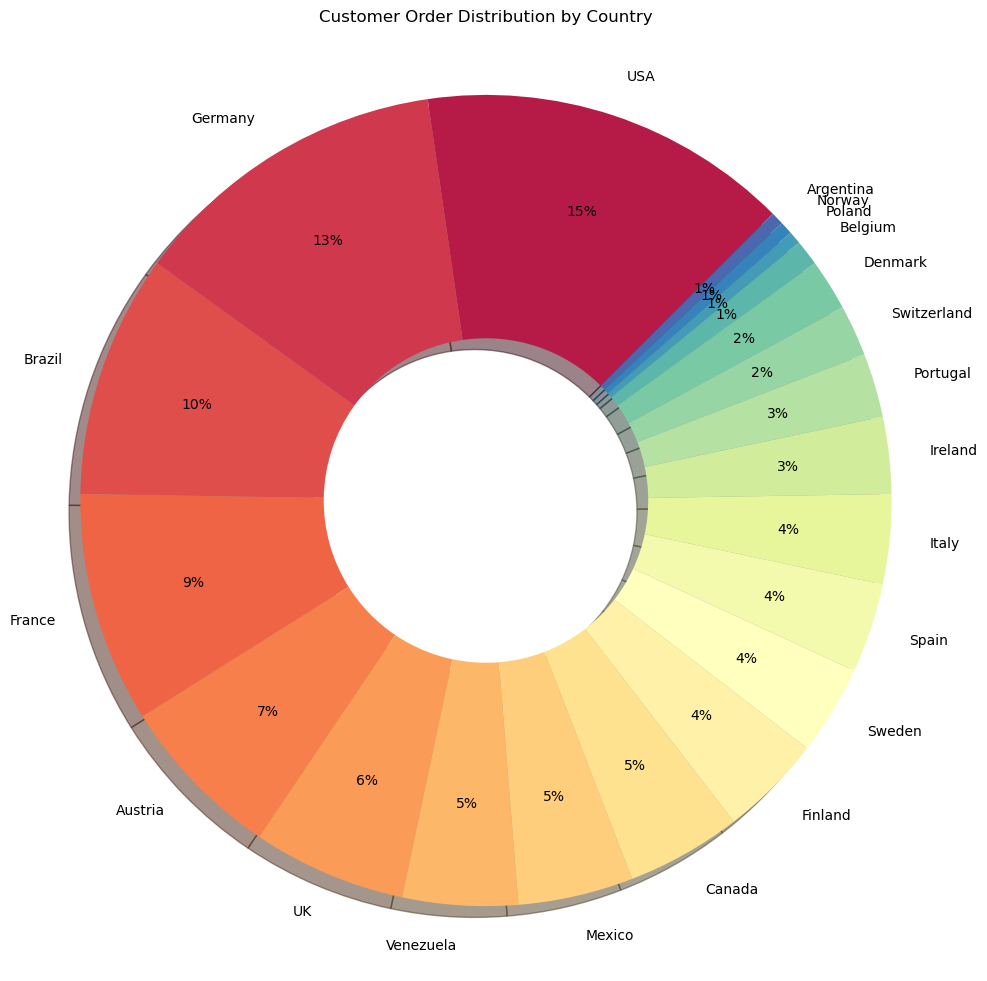

In [29]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data=country_ordercount, columns=['Country', 'TotalOrders'])
print(df)

# TODO: Generate a visualization on this dataframe
# Set Country as the index for the pie chart
df.set_index('Country', inplace=True)


# Select color for pie chart
colors = sns.color_palette('Spectral', len(df))

# Plot a pie chart 
ax = df['TotalOrders'].plot.pie(
    figsize=(10, 10),
    labels= df.index,
    autopct='%.0f%%',
    colors=colors,
    pctdistance=0.75,
    labeldistance = 1.1,
    startangle=45,
    shadow=True,
    wedgeprops=dict(width=0.6),
    legend=False
)

ax.set_ylabel('') 
ax.set_title('Customer Order Distribution by Country')
ax.axis('equal') 
plt.tight_layout()
plt.show()


### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [30]:
# TODO: Write a SQL query which will answer the question above.
# Use LEFT JOIN from Customers to Orders tables, filter for customers with null orders,
# then group the results by country to count such null values.
cursor.execute("""SELECT c.Country, COUNT(c.CustomerID)
               FROM Customers as c LEFT JOIN Orders as o
               ON c.CustomerID = o.CustomerID
               WHERE o.CustomerID IS NULL
               GROUP BY Country;
""")

# TODO: Fetch your list of tuples and print it out
country_nullcount = cursor.fetchall()
print(country_nullcount)

[('Argentina', 2), ('Belgium', 1), ('Canada', 1), ('France', 4), ('Germany', 2), ('Spain', 1), ('UK', 1), ('USA', 5)]


     Country  Customer Count
0  Argentina               2
1    Belgium               1
2     Canada               1
3     France               4
4    Germany               2
5      Spain               1
6         UK               1
7        USA               5


C:\Users\since\AppData\Local\Temp\ipykernel_37780\928728858.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Count', y='Country', data=df, orient='h', palette='Spectral')


Text(0.5, 1.0, 'Countries with Customers Who Have No Orders')

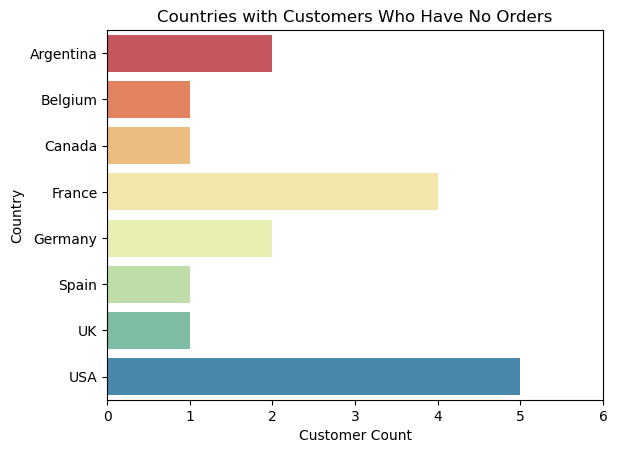

In [31]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data=country_nullcount, columns=['Country', 'Customer Count'])
print(df)

# TODO: Generate a visualization on this dataframe
sns.barplot(x='Customer Count', y='Country', data=df, orient='h', palette='Spectral') 
plt.ylabel('Country')
plt.xlabel('Customer Count')
plt.xticks([0,1,2,3,4,5,6])
plt.title('Countries with Customers Who Have No Orders')

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [46]:
# TODO: Write a SQL query which will answer the question above.
#Join three tables - Suppliers, Products and OrderDetails,
# group by supplier name, and sort by order count (descending).
cursor.execute("""SELECT s.SupplierName, COUNT(od.OrderID) as OrderCount
               FROM Suppliers as s INNER JOIN Products as p
               ON s.SupplierID = p.SupplierID
               JOIN OrderDetails as od ON p.ProductID = od.ProductID
               GROUP BY SupplierName
               ORDER BY OrderCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
supplier_popcount = cursor.fetchall()
print(supplier_popcount)

[('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 19), ('New England Seafood Cannery', 17), ("Mayumi's", 17), ('Leka Trading', 17), ('Bigfoot Breweries', 16), ('Heli Süßwaren GmbH & Co. KG', 15), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Svensk Sjöföda AB', 14), ('Tokyo Traders', 12), ('Refrescos Americanas LTDA', 11), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ('Lyngbysild', 8), ('PB Knäckebröd AB', 6), ("Grandma Kelly's Homestead", 6), ('Zaanse Snoepfabriek', 4), ('Escargots Nouveaux', 4)]


                              SupplierName  OrderCount
0        Plutzer Lebensmittelgroßmärkte AG          42
1                            Pavlova, Ltd.          40
2                 Specialty Biscuits, Ltd.          33
3                          Norske Meierier          32
4                  Formaggi Fortini s.r.l.          31
5                             Gai pâturage          26
6                            Exotic Liquid          21
7                     Pasta Buttini s.r.l.          20
8               New Orleans Cajun Delights          20
9                                Ma Maison          19
10                               Karkki Oy          19
11                             G'day, Mate          19
12             New England Seafood Cannery          17
13                                Mayumi's          17
14                            Leka Trading          17
15                       Bigfoot Breweries          16
16             Heli Süßwaren GmbH & Co. KG          15
17        

C:\Users\since\AppData\Local\Temp\ipykernel_37780\733507520.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OrderCount', y='SupplierName', data=df, palette='Spectral')


Text(0.5, 1.0, 'Quantity of Products by Supplier')

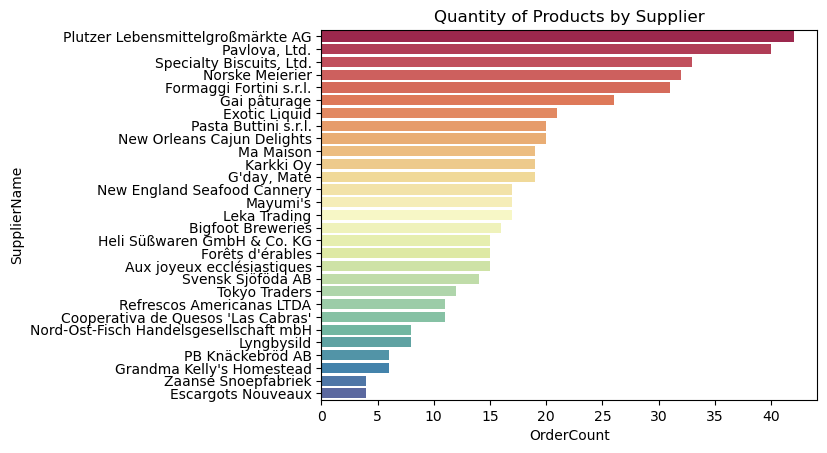

In [47]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data=supplier_popcount, columns=['SupplierName', 'OrderCount'])
print(df)

# TODO: Generate a visualization on this dataframe
sns.barplot(x='OrderCount', y='SupplierName', data=df, palette='Spectral') 
plt.ylabel('SupplierName')
plt.xlabel('OrderCount')
plt.title('Quantity of Products by Supplier')

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

USA, Germany, and France have the greatest number of customers, 13, 11 and 11, respectively. There is a moderately strong correlation between customers and suppliers in cuntries evident by the pearson correlation of 0.74.

    Country  CustomerCount  SupplierCount
0       USA             13              4
1   Germany             11              3
2    France             11              3
3    Brazil              9              1
4        UK              7              2
5     Spain              5              1
6     Italy              3              2
7    Canada              3              2
8    Sweden              2              2
9   Finland              2              1
10  Denmark              2              1
11   Norway              1              1


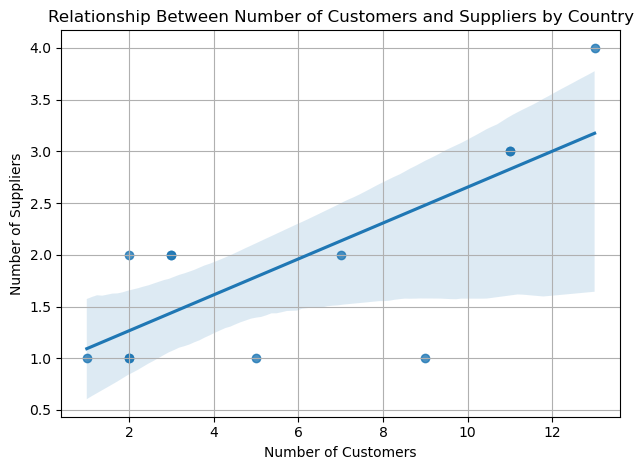

Pearson correlation coefficient: 0.74


In [39]:
# Created a dataframe from the customer and suppliers SQL fetches
customer_df = pd.DataFrame(data=customer_country, columns=['Country', 'CustomerCount'])
supplier_df = pd.DataFrame(data=supplier_country, columns=['Country', 'SupplierCount'])

# Merged both dataframes on Country
merged_df = pd.merge(customer_df, supplier_df, on='Country', how='inner')
print(merged_df)

# Created a scatterplot with regression line
sns.regplot( data=merged_df, x='CustomerCount', y='SupplierCount')

plt.title('Relationship Between Number of Customers and Suppliers by Country')
plt.xlabel('Number of Customers')
plt.ylabel('Number of Suppliers')
plt.grid(True)
plt.tight_layout()
plt.show()

#Calculate the Pearson Correlation Coefficient
correlation = merged_df['CustomerCount'].corr(merged_df['SupplierCount'])
print(f"Pearson correlation coefficient: {correlation:.2f}")

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

Geitost is the least popular product by quantity with 2.5 orders. The pearson coeffient indicates there is no relationship between the quantity and revenue of the products.

    ProductID                      ProductName  Price  Quantity  TotalRevenue
0          67        Laughing Lumberjack Lager  14.00         5          70.0
1          45                      Røgede sild   9.50        15         142.5
2          52                         Filo Mix   7.00        20         336.0
3          22              Gustaf's Knäckebröd  21.00         6         378.0
4          15                     Genen Shouyu  15.50        20         387.5
5          13                            Konbu   6.00        10         552.0
6          73                       Röd Kaviar  15.00        25         675.0
7          24               Guaraná Fantástica   4.50        15         711.0
8           7  Uncle Bob's Organic Dried Pears  30.00        15         750.0
9          33                          Geitost   2.50        25         790.0
10          3                    Aniseed Syrup  10.00        30         800.0
11         48                        Chocolade  12.75        70 

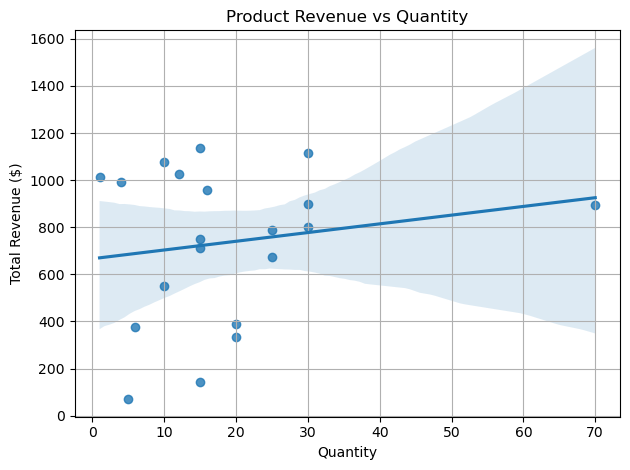

Pearson correlation coefficient: 0.17


In [48]:
#Show the dataframe
print(leastpop_df)

# Created a scatterplot with regression line
sns.regplot(x= 'Quantity', y='TotalRevenue', data=leastpop_df)
plt.xlabel('Quantity')
plt.ylabel('Total Revenue ($)')
plt.title('Product Revenue vs Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

#Calculate the Pearson Correlation Coefficient
correlation = leastpop_df['Quantity'].corr(leastpop_df['TotalRevenue'])
print(f"Pearson correlation coefficient: {correlation:.2f}")

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

Germany and Australia have the most orders. There is no correlation to most orders and number of customers who do not order.

        Country  OrderQuantity  NoOrderCustomerCount
0     Argentina              1                     2
1       Austria             13                     0
2       Belgium              2                     1
3        Brazil             19                     0
4        Canada              9                     1
5       Denmark              4                     0
6       Finland              8                     0
7        France             18                     4
8       Germany             25                     2
9       Ireland              6                     0
10        Italy              7                     0
11       Mexico              9                     0
12       Norway              1                     0
13       Poland              1                     0
14     Portugal              5                     0
15        Spain              7                     1
16       Sweden              7                     0
17  Switzerland              4                

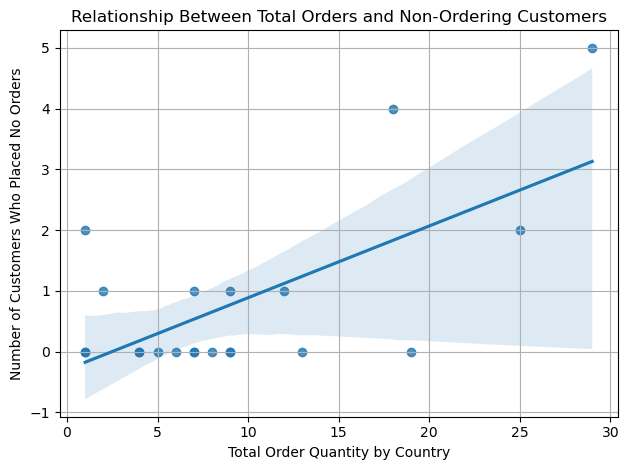

Pearson correlation coefficient: 0.65


In [41]:
# Create DataFrame from country_ordercount (total quantity per country)
order_df = pd.DataFrame(data=country_ordercount, columns=['Country', 'OrderQuantity'])
null_df = pd.DataFrame(data=country_nullcount, columns=['Country', 'NoOrderCustomerCount'])

# Merge both DataFrames by Country
merged_df = pd.merge(order_df, null_df, on='Country', how='outer').fillna(0)
merged_df['NoOrderCustomerCount'] = merged_df['NoOrderCustomerCount'].astype(int)
print(merged_df)

# Created a scatterplot with regression line
sns.regplot(data=merged_df, x='OrderQuantity', y='NoOrderCustomerCount')

plt.title('Relationship Between Total Orders and Non-Ordering Customers')
plt.xlabel('Total Order Quantity by Country')
plt.ylabel('Number of Customers Who Placed No Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = merged_df['OrderQuantity'].corr(merged_df['NoOrderCustomerCount'])
print(f"Pearson correlation coefficient: {correlation:.2f}")

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

The supplier with the most orders is Plutzer Lebensmittelgroßmärkte AG with 42 total orders. Question 8 has the evidence to support this answer.